In [1]:
from sympy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# from scipy import integrate

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)

In [20]:
from operator import contains


epsilon = 0.5
EE = symbols('E_E', constant=True)
EI = symbols('E_I', constant=True)
EL = symbols('E_L', constant=True)
Mg = symbols('Mg', constant=True)
beta = symbols('beta', constant=True)
gamma = symbols('gamma', constant=True)
theta = symbols('theta', constant=True)
tauA = symbols('tau_A', constant=True, positive=True)
tauN = symbols('tau_N', constant=True, positive=True)
tauI = symbols('tau_I', constant=True, positive=True)
tauL = symbols('tau_L', constant=True, positive=True)
tau = symbols('tau', constant=True, positive=True)
sigmaV = symbols('sigma_V', constant=True, positive=True)
nu = symbols('nu', constant=True, positive=True)
mu = symbols('mu', constant=True, positive=True)
sigmaA = symbols('sigma_A', constant=True, positive=True)
sigmaN = symbols('sigma_N', constant=True, positive=True)
sigmaI = symbols('sigma_I', constant=True, positive=True)
V = symbols('V', positive=False)
wE = symbols('w_E', constant=True, positive=True)
wI = symbols('w_I', constant=True, positive=True)
KE = symbols('K_E', constant=True, positive=True)
KI = symbols('K_I', constant=True, positive=True)
nuE = symbols('nu_E', constant=True, positive=True)
alpha = symbols('alpha', constant=True, positive=True)
muA = symbols('mu_A', constant=True)
muN = symbols('mu_N', constant=True)
muI = symbols('mu_I', constant=True)
# s = Function('s')(V)
# hE = Function('h_E')(V)
# dhEdV = symbols('dh_E')
Mg = symbols('[Mg^2+]')
muA = wE*KE*nu*tauA
muN = wE*KE*nu*tauN
muI = wI*KI*nu*tauI
sigmaA = wE*sqrt(KE*nu*tauA)
sigmaN = wE*sqrt(KE*nu*tauN)
sigmaI = wI*sqrt(KI*nu*tauI)
s = 1 / ( 1 + (Mg/gamma)*exp(-beta*V))
tau = tauL/(1 + (1 - alpha)*muA + alpha*s*muN + muI)
mu = (tau/tauL)*(EL + ((1 - alpha)*muA + alpha*s*muN)*EE + muI*EI)

# rho = Function('rho')(V)

W0 = (mu - V) / tau
WA = (1 - alpha) * sqrt(tauA) * sigmaA * (EE - V) / tauL
WN = alpha * s * sqrt(tauN) * sigmaN * (EE - V) / tauL
WI = sigmaI * sqrt(tauI) * (EI - V) / tauL
dW0 = diff(W0, V)
dWA = diff(WA, V)
dWN = diff(WN, V)
dWI = diff(WI, V)

FA = ((dW0 - (dWA / WA) * W0))
FN = ((dW0 - (dWN / WN) * W0))
FI = ((dW0 - (dWI / WI) * W0))
dFA = diff(FA, V)
dFN = diff(FN, V)
dFI = diff(FI, V)

S0 = -W0
SA = (1/2) * (WA / Piecewise((epsilon, Abs((1 - tauA*(dW0 - (dWA / WA) * W0))) < epsilon), ((1 - tauA*(dW0 - (dWA / WA) * W0)), True))) * (1 - 0.01*tauA**2 * dFA * WA)
SN = (1/2) * (WN / Piecewise((epsilon, Abs((1 - tauN*(dW0 - (dWN / WN) * W0))) < epsilon), ((1 - tauN*(dW0 - (dWN / WN) * W0)), True))) * (1 - 0.01*tauN**2 * dFN * WN)
SI = (1/2) * (WI / Piecewise((epsilon, Abs((1 - tauI*(dW0 - (dWI / WI) * W0))) < epsilon), ((1 - tauI*(dW0 - (dWI / WI) * W0)), True))) * (1 - 0.01*tauI**2 * dFI * WI)
dSA = diff(SA, V)
dSN = diff(SN, V)
dSI = diff(SI, V)

Xi = ((WA*SA + WN*SN + WI*SI))

B = (S0 + (WA * dSA) + (WN * dSN) + (WI * dSI)) / Xi
x = (1 - tauA*(dW0 - (dWA / WA) * W0))
F = (1/2) * WA / Piecewise((-epsilon, Interval(-epsilon, 0).contains(x)), (epsilon, Interval(0, epsilon).contains(x)), (x,  True))

# SF = hF/(2*(tau + tauF*(1 - (dhFdV/hF)*(V-mu))))
# dSFdV = diff(SF, V)
# SS = hS/(2*(tau + tauS*(1 - (dhSdV/hS)*(V-mu))))
# dSSdV = diff(SS, V)
# SI = hI/(2*(tau + tauI*(1 - (dhIdV/hI)*(V-mu))))
# dSIdV = diff(SI, V)

# Xi = hF*SF + hS*SS + hI*SI

alpha_v = 0.9
# B = (S0 + hF*dSFdV + hS*dSSdV + hI*dSIdV)/Xi
H = Heaviside(V - EL)/Xi
# integrate(B0, V)
# expand(dSEdV)
# SE
# H = H.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:0.1, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
# B = B.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:0.1, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
# F = F.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:0.1, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
# FA = FA.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:0.1, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
# FN = FN.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:0.1, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
# FI = FI.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:0.1, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
# H = lambdify(V,H)
# B = lambdify(V,B)
# F = lambdify(V,F)
# FA = lambdify(V,FA)
# FN = lambdify(V,FN)
# FI = lambdify(V,FI)


In [21]:
def integrate_p0(vec_Vk, B, H):
	"""Integrate the unnormalized probability distribution p0"""

	vec_p0_fliped = np.zeros_like(vec_Vk)
	dV = vec_Vk[1] - vec_Vk[0]
	vec_Vk_fliped = np.flip(vec_Vk)

	vec_p0_fliped[0] = 0

	for j, (Vk, p0) in enumerate(zip(vec_Vk_fliped[:-1], vec_p0_fliped[:-1])):
		Bk = B(Vk)
		Hk = H(Vk)
		
		if(-0.000001 <= Bk <= 0.000001):
			vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk
		else:
			vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)

	vec_p0 = np.flip(vec_p0_fliped)

	return vec_p0

def calculate_firing_rate(vec_Vk, B, H):
		tauR_val = 2
		vec_p0 = integrate_p0(vec_Vk, B, H)
		dV = vec_Vk[1] - vec_Vk[0]

		return 1 / (tauR_val + dV * np.sum(vec_p0))

In [22]:
vec_Vk = np.linspace(-80, -50, 30000 + 1, dtype=np.longdouble)
vec_alpha = np.linspace(0.001, 1, 50)
vec_nu = []

for alpha_v in vec_alpha:
	print(alpha_v)
	H_s = H.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
	B_s = B.subs({EE:0, EL:-60, tauL:20, tauA:1, tauN:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:alpha_v, beta:0.062, gamma:3.57, Mg:1})
	H_f = lambdify(V, H_s)
	B_f = lambdify(V, B_s)
	vec_nu.append(calculate_firing_rate(vec_Vk, B_f, H_f))

# vec_p0_fliped = np.zeros_like(vec_Vk)
# dV = vec_Vk[1] - vec_Vk[0]
# vec_Vk_fliped = np.flip(vec_Vk)

# vec_p0_fliped[0] = 0

# for j, (Vk, p0) in enumerate(zip(vec_Vk_fliped[:-1], vec_p0_fliped[:-1])):
# 	Bk = B(Vk)
# 	Hk = H(Vk)
# 	if(-0.000001 <= Bk <= 0.000001):
# 		vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk
# 	else:
# 		vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)
# plt.ylim(-1,1)
# vec_p0 = np.flip(vec_p0_fliped)
# v = B(vec_Vk)
# plt.xlim(-65,-50)
# plt.ylim(0,0.015)
# plt.plot(vec_Vk, integrate_p0(vec_Vk))
# plt.plot(vec_Vk, FA(vec_Vk))
# plt.plot(vec_Vk, H(vec_Vk))
# plt.plot(vec_Vk, B(vec_Vk))
# plt.plot(vec_Vk, F(vec_Vk))
# calculate_firing_rate(vec_Vk)

0.001
0.021387755102040818
0.041775510204081635
0.062163265306122456
0.08255102040816327
0.10293877551020408
0.12332653061224491
0.1437142857142857
0.16410204081632654
0.18448979591836737
0.20487755102040817
0.225265306122449
0.24565306122448982
0.26604081632653065
0.2864285714285714
0.30681632653061225
0.3272040816326531
0.3475918367346939
0.36797959183673473
0.3883673469387755
0.40875510204081633
0.42914285714285716
0.449530612244898
0.4699183673469388
0.49030612244897964
0.5106938775510205
0.5310816326530613
0.551469387755102
0.5718571428571428
0.5922448979591837
0.6126326530612245
0.6330204081632653
0.6534081632653062
0.673795918367347
0.6941836734693878
0.7145714285714286
0.7349591836734695
0.7553469387755103
0.775734693877551
0.7961224489795918
0.8165102040816327
0.8368979591836735
0.8572857142857143
0.8776734693877551
0.898061224489796
0.9184489795918368
0.9388367346938776
0.9592244897959185


/tmp/ipykernel_7802/1809943481.py:17: RuntimeWarning: overflow encountered in longdouble_scalars
  vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)


0.9796122448979593
1.0


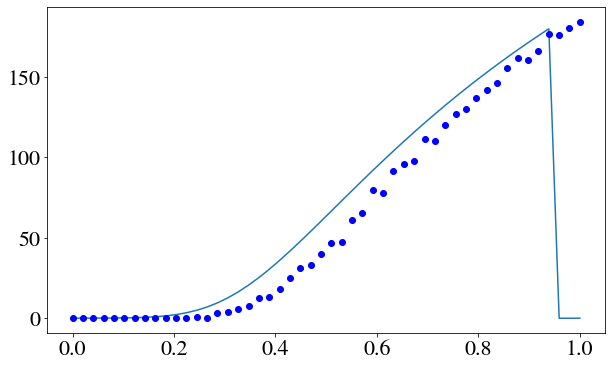

In [23]:
fRate_data_path = "../../Data/fRate_data/"
df_nu_wI_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_iRate_fullNMDA_rate.dat", index_col=0)
valpha = np.linspace(0,1,50)
plt.figure(figsize=(10,6))
plt.plot(vec_alpha, np.array(vec_nu)*1000)
plt.plot(valpha, df_nu_wI_sim_read['5'], 'bo')

In [1]:
k = symbols('k')
simplify(Xi.subs({EE:0, EL:-60, tauL:20, tauA:5, tauN:100, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100, alpha:0.1, beta:0.062, gamma:3.57, Mg:1, k:1})).subs(V,-80).evalf()

NameError: name 'symbols' is not defined

<lambdifygenerated-57>:2: RuntimeWarning: divide by zero encountered in true_divide
  return Heaviside(V + 60, 1/2)/(0.00625*V**2/(20.0 - 10*(V + 55.0)/V) + 0.1*(-V - 80)**2/(30.0 + 20*(V + 55.0)/(-V - 80)))


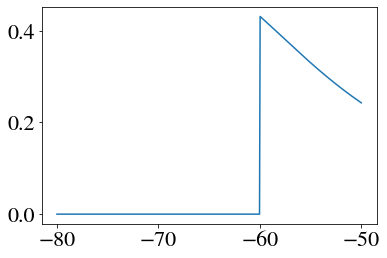

In [33]:
B_f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
dSE_f = lambdify(V, dSEdV.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
SE_f = lambdify(V, SE.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
hE_f = lambdify(V, hE.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
H_f = lambdify(V, H.subs({EE:0, EL:-60, theta:-50, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))

vec_x = np.linspace(-80, -50, 1000)
plt.plot(vec_x, H_f(vec_x))

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100)
axs[0][0].set_title(r'$\tau_E=5ms$')
tauE_value = 5
f0 = lambdify(V, B0.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fE = lambdify(V, BE.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fI = lambdify(V, BI.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
vec_x = np.linspace(-1000, -50, 1000)
axs[0][0].plot(vec_x, f0(vec_x), 'b-', label=r'$B_0$')
axs[0][0].plot(vec_x, fE(vec_x), 'r-', label=r'$B_E$')
axs[0][0].plot(vec_x, fI(vec_x), 'g-', label=r'$B_I$')
axs[0][1].plot(vec_x, f(vec_x), 'y', label=r'$B$')
axs[0][0].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[0][1].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[0][0].set_title(r'$\tau_E=5ms$')
tauE_value = 100
f0 = lambdify(V, B0.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fE = lambdify(V, BE.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fI = lambdify(V, BI.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
axs[1][0].plot(vec_x, f0(vec_x), 'b-', label=r'$B_0$')
axs[1][0].plot(vec_x, fE(vec_x), 'r-', label=r'$B_E$')
axs[1][0].plot(vec_x, fI(vec_x), 'g-', label=r'$B_I$')
axs[1][1].plot(vec_x, f(vec_x), 'y', label=r'$B$')
axs[1][0].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[1][1].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[1][0].set_title(r'$\tau_E=100ms$')

In [ ]:
x = symbols('x')
an = symbols('a_n', constant=True)
bn = symbols('b_n', constant=True)
cn = symbols('c_n', constant=True)
dn = symbols('d_n', constant=True)

ad = symbols('a_d', constant=True)
bd = symbols('b_d', constant=True)
cd = symbols('c_d', constant=True)
dd = symbols('d_d', constant=True)
ed = symbols('e_d', constant=True)

num_generic = poly(an*x + bn*x**2 + cn*x**3 + dn*x**4)
den_generic = poly(ad*x + bd*x**2 + cd*x**3 + dd*x**4 + ed*x**5)

expression = num_generic/den_generic

integrate(expression, x)


In [ ]:
IE_is = IE_i.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4})

IE_if = lambdify(V, IE_is)
vec_x = np.linspace(-100, -50, 1000)
vec_IE = IE_if(vec_x)

plt.plot(vec_x, vec_IE)


In [ ]:
def IE(x):
    return integrate.quad(IE_if, -np.inf, x, limit=1000)[0]
IE = np.vectorize(IE)
integrand = ((EE - V)**(2*tauL**2/(sigmaE**2*tau*tauE))/hE*exp(LE)).subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4})
ii = lambdify(V, integrand)
vec_ii = ii(vec_x)*IE(vec_x)

plt.plot(vec_x, vec_ii)
# integrand

In [ ]:
simplify((hE*FE).subs({V:mu}))

In [ ]:
integrand = simplify((EE - V)**(-tau/(sigmaE**2*tau**4))*exp(-LE)/FE)
integrands = simplify(integrand.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4}))


# f = lambdify(V, integrands)
# data = np.linspace(-100, -50, 1000)
# plt.plot(data, f(data))
integrands

In [ ]:
x = symbols('x')
integrand = (V - mu)/(hE*FE*tau)
I = simplify(integrand)
I
simplify(integrate(I, V))

In [ ]:
# hA/(1 + (tauA/tau)*(1 - (dhAdV/hA)*(V-mu)))
hA
FAs

In [ ]:
FA = simplify(FA)
FAs = simplify(FA.subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:0.005, wE:0.4}))

f = lambdify(V, FAs)
data = np.linspace(-100, 100, 1000)
plt.plot(data, f(data))

In [42]:
x = symbols('x')
# FA = symbols('F_A')

exponent = (-tauL**2*(EE - mu)/(sigmaA**2*tau**2*tauA*(EE - V)) * (2*tau - tauA*(EE - 2*V + mu)/(EE-V)))
# exponent

coeff = ((EE - V)**(-2*tauL**2/(sigmaA**2*tau*tauA)))/FA
coeff

integrand = coeff*exp(exponent)
integrand = simplify(integrand)
# integrand

# integrand
# I = integrate(integrand, (V, -oo, x))
# collect(collect(collect(collect(factor(GA), log(-EE + V)), V), EE), mu)
# integrand.subs

In [ ]:
expr = integrand.subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:0.005, wE:0.4})
expr = simplify(expr)
f = lambdify(V, expr)
data = np.linspace(-60, -50, 1000)
# f(data)
plt.plot(data, f(data))
# expr

In [ ]:
C = (tauL*sqrt(tauA)/(sigmaA*tau**2))*(tau*(EE-V) + tauA*(EE-mu))/(V-EE)**(2*(1+tauL**2/(tauA*tau*sigmaA**2)))
exponential = exp(-tauL**2*(EE**2*(2 - tauA/tau) - 2*EE*mu - 2*V*(EE-mu)*(1 - tauA/tau) + mu**2*tauA/tau)/(sigmaA**2*tau*tauA*(EE-V)**2))

expr = simplify(C*exponential).subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:5, wE:0.1})
f = lambdify(V, expr)
data = np.linspace(-100, -50, 100)
# f(data)
expr

True